In [85]:
from importlib import import_module

import pandas as pd
import numpy as np

df = pd.read_csv("east_merged_all.csv", index_col="time")
df.head()

,sur_air_temp,relative_humidity,H2O_vapor_mass_ratio,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,surf_temp,albedo_500,cloud_temp
time,,,,,,,,
2020-01-01,0.1625,-9999.0,-9999.0,3.507812,0.000,-5.4000,-1.267651e+30,-16.52500
2020-01-02,2.7875,-9999.0,-9999.0,3.652344,0.000,6.2875,9.304000e-01,-2.65000
2020-01-03,-9999.0000,-9999.0,-9999.0,-9999.000000,0.070,-9999.0000,-1.267651e+30,-26.86875
2020-01-04,-9999.0000,-9999.0,-9999.0,-9999.000000,1.155,1.2250,-1.267651e+30,-16.27500
2020-01-05,-1.4000,-9999.0,-9999.0,2.351562,0.000,4.0375,-1.267651e+30,-12.90000


In [86]:
#transform extreme dataset into missing/null
columns = df.columns[:]

def transform_extreme(df):
    for col in columns:
        df.loc[df[col] == -9999, col] = np.nan
        if "albedo" in col.lower():
            df.loc[(df[col] < 0) | (df[col] > 1), col] = np.nan
        df.loc[(df[col] < -1e10) | (df[col] > 1e10), col] = np.nan
    return df

df = transform_extreme(df)
print(df.isnull().sum())

sur_air_temp                  826
relative_humidity            1231
H2O_vapor_mass_ratio         1231
H2O_vapor_mass_ratio_surf     869
mean_precipitation_rate         0
surf_temp                     473
albedo_500                   1467
cloud_temp                    214
dtype: int64


In [82]:
#remove entire columns with missing values greater than 1200
missing_counts = df.isnull().sum()
df = df.loc[:, missing_counts <= 1200]
df.isnull().sum()

sur_air_temp                 826
H2O_vapor_mass_ratio_surf    869
mean_precipitation_rate        0
surf_temp                    473
cloud_temp                   214
dtype: int64

In [83]:
#imputing missing values with forward/backward + interpopation
from sklearn.impute import SimpleImputer
import numpy as np

# Handle any non-numeric values first
df = df.apply(pd.to_numeric, errors='coerce')

# Forward fill missing values first
df = df.ffill()
# Then backward fill any remaining missing values
df = df.ffill()
# Use interpolation for any still remaining missing values
df = df.interpolate(method='linear', limit_direction='both')
# Final check - replace any remaining NaN with column means
df = df.fillna(df.mean())
# Verify no missing values remain
print(df.isnull().sum())
df.describe()

sur_air_temp                 0
H2O_vapor_mass_ratio_surf    0
mean_precipitation_rate      0
surf_temp                    0
cloud_temp                   0
dtype: int64


,sur_air_temp,H2O_vapor_mass_ratio_surf,mean_precipitation_rate,surf_temp,cloud_temp
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,11.588697,6.888645,3.222110,12.510762,-16.868320
std,9.359885,3.879250,7.543449,11.736518,15.319634
min,-11.337500,0.816406,0.000000,-19.931250,-63.306252
25%,3.537500,3.761719,0.000000,2.537500,-27.196875
50%,11.912500,5.750000,0.060000,12.600000,-16.337500
75%,19.912500,9.839844,2.330000,23.287500,-5.962500
max,29.475000,18.390625,97.679977,37.349998,24.162500


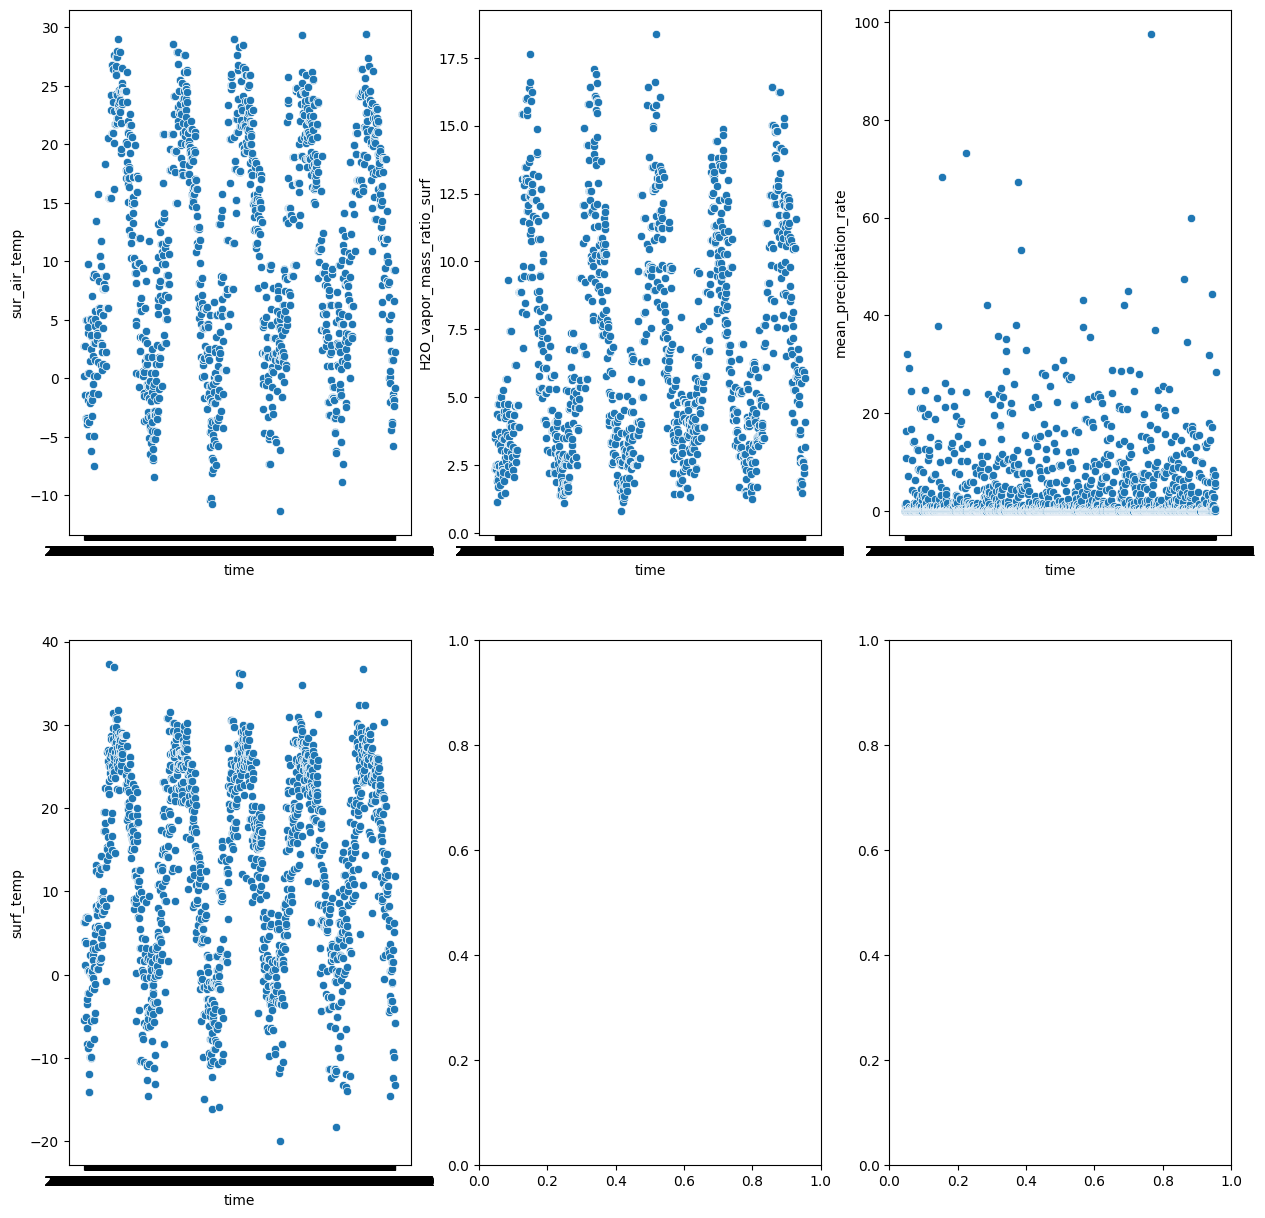

In [84]:
#visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns
_, axss = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
sns.scatterplot(data=df, x="time", y="sur_air_temp", ax=axss[0, 0])
sns.scatterplot(data=df, x="time", y="H2O_vapor_mass_ratio_surf", ax=axss[0, 1])
sns.scatterplot(data=df, x="time", y="mean_precipitation_rate", ax=axss[0, 2])
sns.scatterplot(data=df, x="time", y="surf_temp", ax=axss[1, 0])

plt.show()